In [1]:
# %% Patch the PYTHONPATH to run scripts native to parent-level folder
import sys
import os
PACKAGE_PARENT = '..'
sys.path.append(os.path.normpath(os.path.expanduser("~/tallem")))

In [9]:
import pickle
X = pickle.load(open("/Users/mpiekenbrock/tallem/blob_images_uniform_domain.p", 'rb'))


fig = plt.figure(figsize=(8, 8))
for i, p in enumerate(P[0:30]):
	fig.add_subplot(5, 10, i+1)
	plt.imshow(P[i], cmap='gray', vmin=0, vmax=max_val)
	fig.gca().axes.get_xaxis().set_visible(False)
	fig.gca().axes.get_yaxis().set_visible(False)

array([[4.04674539e-37, 1.50626149e-35, 3.30434979e-34, ...,
        1.80194244e-04, 4.09271511e-06, 5.47864635e-08],
       [1.97090679e-03, 3.52058897e-02, 3.70642924e-01, ...,
        1.57555569e-34, 1.71735116e-36, 1.10325424e-38],
       [3.25906973e-39, 6.37554039e-39, 7.35074744e-39, ...,
        2.91299585e-17, 3.47727730e-20, 2.44641390e-23],
       ...,
       [1.22079082e-12, 1.63230333e-10, 1.28632771e-08, ...,
        1.72712528e-16, 1.40915758e-17, 6.77620337e-19],
       [4.73673583e-25, 8.28984275e-22, 8.55075713e-19, ...,
        1.35098312e-41, 1.44275690e-41, 9.08087189e-42],
       [7.73940187e-67, 3.36924204e-63, 8.64466513e-60, ...,
        2.16433101e+00, 5.74942754e+00, 9.00153716e+00]])

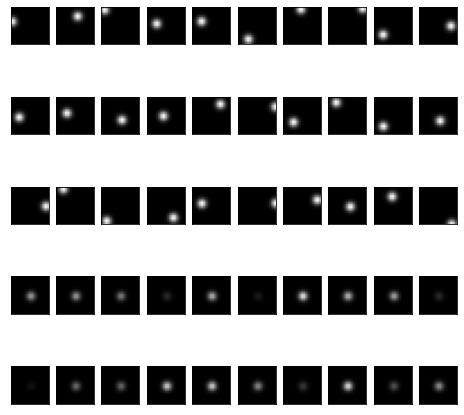

In [110]:
max_val = mvn_density(np.array([[0,0]]), [0, 0], Sigma)[0]
phi = np.random.uniform(low=0, high=2*np.pi, size=100)
theta = np.random.uniform(low=-np.pi/2, high=np.pi/2, size=100)

X, Y = (phi/(2*np.pi))*17, ((theta/np.pi)*17) + (17/2)
# print(np.min(X), np.max(X), np.min(Y), np.max(Y))

P = [gaussian_pixel([x, y], Sigma, s=1) for x,y in np.c_[X,Y]]

#print((phi/(2*np.pi)))
# plt.imshow(P[1], cmap='gray', vmin=0, vmax=np.max(P[i]))

fig = plt.figure(figsize=(8, 8))
for i, p in enumerate(P[0:30]):
	fig.add_subplot(5, 10, i+1)
	plt.imshow(P[i], cmap='gray', vmin=0, vmax=max_val)
	fig.gca().axes.get_xaxis().set_visible(False)
	fig.gca().axes.get_yaxis().set_visible(False)


## Generate images w/ varying intensity 
phi = np.repeat(np.pi, 100)
theta = np.repeat(0.0, 100)
R = np.random.uniform(low=0,high=1,size=100)
X, Y = (phi/(2*np.pi))*17, ((theta/np.pi)*17) + (17/2)
Q = [gaussian_pixel([x, y], Sigma, s=np.abs(r)) for x,y,r in np.c_[X,Y,R]]

phi = np.repeat(0, 100)
R = np.random.uniform(low=-1,high=0,size=100)
X, Y = (phi/(2*np.pi))*17, ((theta/np.pi)*17) + (17/2)
Q2 = [gaussian_pixel([x, y], Sigma, s=np.abs(r)) for x,y,r in np.c_[X,Y,R]]


for i, p in enumerate(Q[0:20]):
	fig.add_subplot(5, 10, i+1+30)
	plt.imshow(Q[i], cmap='gray', vmin=0, vmax=max_val)
	fig.gca().axes.get_xaxis().set_visible(False)
	fig.gca().axes.get_yaxis().set_visible(False)

# 	# axs[i].imshow(P[i], cmap='gray', vmin=0, vmax=np.max(P[i]))
# 	# axs.gca().axes.get_yaxis().set_visible(False)
# 	# axs.xticks([])
# 	# axs.yticks([])

In [114]:
sphere = np.vstack([np.ravel(p) for p in P])
line_s1 = np.vstack([np.ravel(q) for q in Q])
line_s2 = np.vstack([np.ravel(q) for q in Q2])
dot = np.vstack((sphere, line_s1, line_s2))
dot.shape

(300, 289)

In [1]:
from src.tallem import TALLEM
from src.tallem.cover import IntervalCover, BallCover


from src.tallem.landmark import landmarks 

L = landmarks(dot, k=25)
r = np.min(L['radii'])
centers = dot[L['indices'],:]
cover = BallCover(centers, r)

## construct the cover
cover.construct(dot)

# for k,v in cover.items():
# 	print(v)

# print(cover.centers)
## Construct the partition of unity 

# LandmarkCover()

## Construct a cover over the polar coordinate
#cover = IntervalCover(B[:,[1]], n_sets = 10, overlap = 0.30, gluing=[1])

## Local euclidean models are specified with a function
# f = lambda x: classical_MDS(dist(x, as_matrix=True), k = 2)

# ## Parameterize TALLEM + transform the data to the obtain the coordinization
# embedding = TALLEM(cover=cover, local_map=f, n_components=3)
# X_transformed = embedding.fit_transform(X, B_polar)


ModuleNotFoundError: No module named 'src.tallem'

In [2]:
from src.tallem.dimred import cmds
f = lambda x: cmds(dist(x, as_matrix=True), k = 2)
embedding = TALLEM(cover, local_map=f, n_components=2)

coords = embedding.fit_transform(dot, B=dot)

ModuleNotFoundError: No module named 'src.tallem'

In [8]:
x = 1